In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("plant_growth_with_rates.csv")

,time_hours,angle_deg,height_cm,angle_rate_deg_per_hr,height_rate_cm_per_hr
0,0,30.50,5.00,0.9300,0.4033
1,6,36.08,7.42,0.9900,0.3358
2,12,42.38,9.03,1.0058,0.3650
3,18,48.15,11.80,0.6958,0.4500
4,24,50.73,14.43,0.5358,0.3550
5,30,54.58,16.06,0.7567,0.3867
6,36,59.81,19.07,0.6200,0.3942
7,42,62.02,20.79,0.3050,0.3383
8,48,63.47,23.13,0.4033,0.3617
9,54,66.86,25.13,0.3750,0.4467


In [9]:
df.isnull()
df.info
df.columns

Index(['time_hours', 'angle_deg', 'height_cm', 'angle_rate_deg_per_hr',
       'height_rate_cm_per_hr'],
      dtype='object')

In [14]:
if 'angle_rate_deg_per_hour' not in df.columns:  #don't recalculate if it is already exists
    df['angle_rate_deg_per_hr'] = np.gradient(df['angle_deg'].values, df['time_hours'].values)
    df['height_rate_cm_per_hr'] = np.gradient(df['height_cm'].values, df['time_hours'].values)
    df['angle_rate_smooth'] = df['angle_rate_deg_per_hr'].rolling(window=3, center=True, min_periods=1).mean() #This takes a rolling average of 3 consecutive points 
df['height_rate_smooth'] = df['height_rate_cm_per_hr'].rolling(window=3, center=True, min_periods=1).mean()
print("Average turning speed (deg/hr):", df['angle_rate_deg_per_hr'].mean())
print("Max turning speed (deg/hr):", df['angle_rate_deg_per_hr'].max())
print("Average growth speed (cm/hr):", df['height_rate_cm_per_hr'].mean())
    

Average turning speed (deg/hr): 0.4407142857142857
Max turning speed (deg/hr): 1.0058333333333334
Average growth speed (cm/hr): 0.35174603174603164


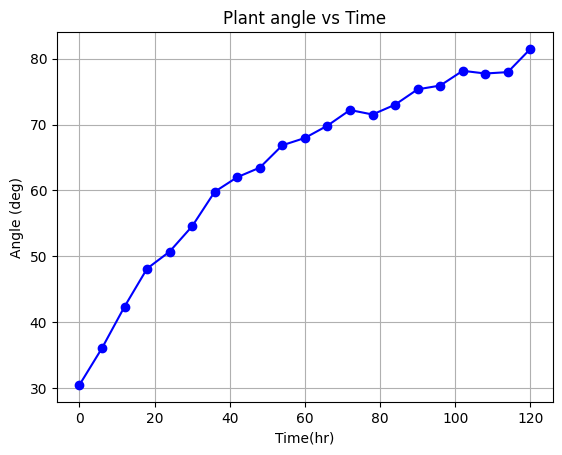

In [28]:
plt.plot(df['time_hours'],df['angle_deg'],marker='o',color = 'blue')
plt.title("Plant angle vs Time")
plt.xlabel("Time(hr)")
plt.ylabel("Angle (deg)")
plt.grid(True)
plt.show()

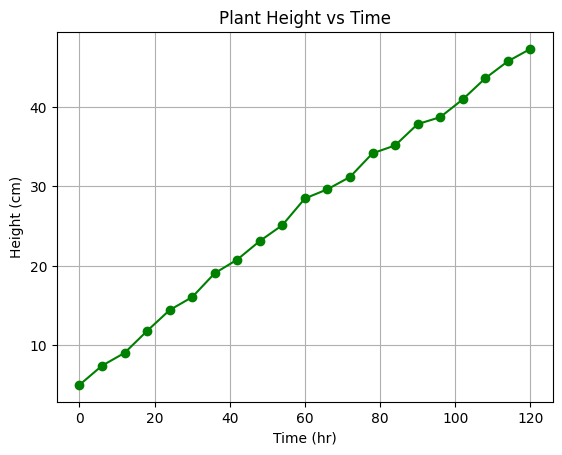

In [32]:
plt.plot(df['time_hours'], df['height_cm'], marker='o', color='green')
plt.title("Plant Height vs Time")
plt.xlabel("Time (hr)")
plt.ylabel("Height (cm)")
plt.grid(True)
plt.show()

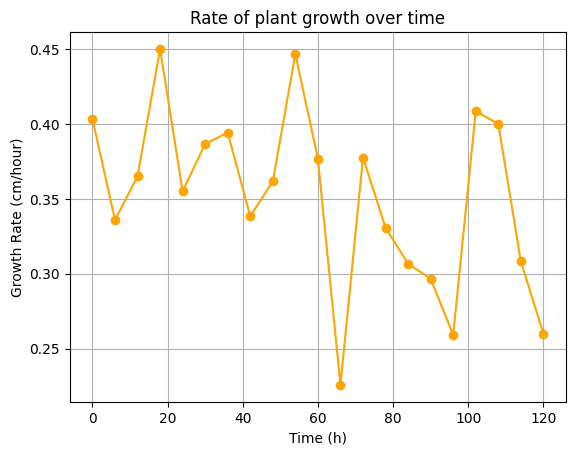

In [34]:
plt.plot(df['time_hours'], df['height_rate_cm_per_hr'], marker='o', color='orange')
plt.title("Rate of plant growth over time")
plt.xlabel("Time (h)")
plt.ylabel("Growth Rate (cm/hour)")
plt.grid(True)
plt.show()
